In [110]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import wget

In [111]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
# wget.download(url, 'car.csv')

In [112]:
df_org = pd.read_csv('car_data.csv')
df_org

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [113]:
df = df_org[['Make',
'Model',
'Year',
'Engine HP',
'Engine Cylinders',
'Transmission Type',
'Vehicle Style',
'highway MPG',
'city mpg',
'MSRP']]

## Data Preparation

In [114]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df = df.fillna(0)
msrp_mean = df['msrp'].mean()
df['above_average'] = np.where(df['msrp']>msrp_mean,1,0)

In [115]:
print(df.columns)

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg', 'msrp',
       'above_average'],
      dtype='object')


In [116]:
df['above_average'].value_counts()

0    8645
1    3269
Name: above_average, dtype: int64

In [117]:
X =  df.drop(['msrp','above_average'],axis=1)
y = df['above_average']

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=1)
X_train,X_val,y_train,y_val =train_test_split(X_train,y_train,test_size=0.25,random_state=1)


In [118]:
pos = X_train[y==1]
pos.reset_index(drop=True,inplace=True)
neg = X_train[y==0]
neg.reset_index(drop=True,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_23628\756708317.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pos = X_train[y==1]
C:\Users\user\AppData\Local\Temp\ipykernel_23628\756708317.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neg = X_train[y==0]


In [119]:
X_numeric = X.select_dtypes(include=[np.number])

In [ ]:
import random
n = 100000
s = 0
for col in X_numeric.columns:
    for i in range(n):
        pos_ind = random.randint(0,len(pos[col])-1)
        neg_ind = random.randint(0,len(neg[col])-1)
        if pos[col][pos_ind] > neg[col][neg_ind]:
            s += 1
    print(col)
    print(s / n)

year
0.63285
engine_hp
1.54831
engine_cylinders
2.18986
highway_mpg
2.53291
city_mpg
2.8284


## Question 2 : Model training

In [121]:
cat = df.columns[list(df.dtypes == 'object')]

X =  df.drop(['msrp','above_average'],axis=1)
X = pd.get_dummies(X,columns=cat,sparse=False)
y = df['above_average']

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=1)
X_train,X_val,y_train,y_val =train_test_split(X_train,y_train,test_size=0.25,random_state=1)

log = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
log.fit(X_train,y_train)
y_pred = log.predict(X_val)
auc_score = roc_auc_score(y_val,y_pred)
print(round(auc_score,3))

0.914


In [122]:
log.score(X_val,y_val)

0.9336970205623164

## Question 3: Precision and recall

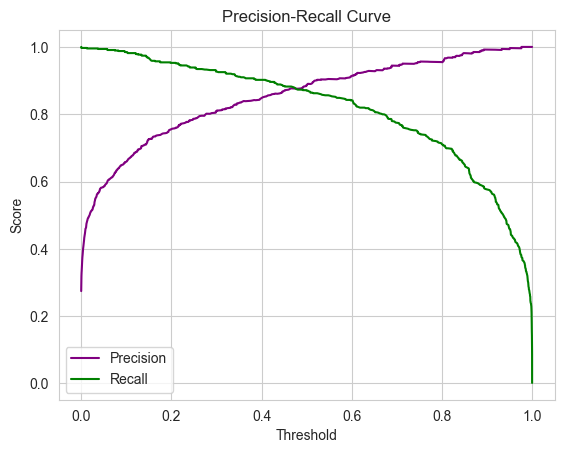

In [123]:

y_score = log.predict_proba(X_val)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_val, y_score)

fig, ax = plt.subplots()
ax.plot(thresholds, precision[:-1], color='purple',label = 'Precision')
ax.plot(thresholds, recall[:-1], color='green',label = 'Recall')
# add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Score')
ax.set_xlabel('Threshold')
plt.legend()
# display plot
plt.show()

## Question 4: F1-score

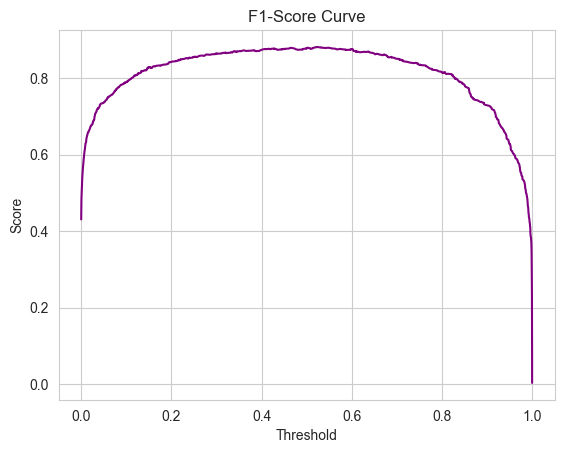

In [124]:
f1_scores = 2 * (precision * recall) / (precision + recall)
fig, ax = plt.subplots()
ax.plot(thresholds, f1_scores[:-1], color='purple')
ax.set_title('F1-Score Curve')
ax.set_ylabel('Score')
ax.set_xlabel('Threshold')
plt.show()

In [125]:
thresholds[np.argmax(f1_scores)]

0.5234603191545881

## Question 5: 5 fold CV

In [126]:


cat = df.columns[list(df.dtypes == 'object')]
X = df.drop(['msrp', 'above_average'], axis=1)
X = pd.get_dummies(X, columns=cat, sparse=False)
y = df['above_average']

log = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
kf = KFold(n_splits=5, shuffle=True, random_state=1)
scores = []
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    log.fit(X_train, y_train)
    y_pred = log.predict_proba(X_val)[:, 1]
    auc_score = roc_auc_score(y_val, y_pred)
    scores.append(auc_score)

print('AUC scores:', scores)
print('Mean AUC score:', round(np.mean(scores), 3))


AUC scores: [0.9809256018158488, 0.9769838048499352, 0.9745918216829014, 0.9788313869358412, 0.978536801501251]
Mean AUC score: 0.978


In [127]:
np.std(scores)

0.002106344117314137

## Question 6 : Hyperparameter tuning

In [128]:
C_values = [0.01, 0.1, 0.5, 10]

kf = KFold(n_splits=5, random_state=1, shuffle=True)

scores = []

# loop over the C values
for C in C_values:
    fold_scores = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_val)[:, 1]
        auc_score = roc_auc_score(y_val, y_pred)
        fold_scores.append(auc_score)

    mean_score = np.mean(fold_scores)
    std_score = np.std(fold_scores)
    mean_score = round(mean_score, 3)
    std_score = round(std_score, 3)
    # append the mean and std to the scores list
    scores.append((mean_score, std_score))

# print the scores for each C value
for i, (C, score) in enumerate(zip(C_values, scores)):
    print(f"C = {C}: mean score = {score[0]}, std = {score[1]}")



C = 0.01: mean score = 0.954, std = 0.002
C = 0.1: mean score = 0.972, std = 0.002
C = 0.5: mean score = 0.977, std = 0.002
C = 10: mean score = 0.978, std = 0.004
